### Racing Game Analysis

What follows will be an analysis of peformance, training, and various other metrics with regards to the racing game environment.

Note that the models we will be speaking of have already been trained, and the metrics pregenerated.

In [10]:
import sys, os
print(os.getcwd())

c:\Users\karat\Documents\topics_in_cs1\DRL-Assignment\notebooks


In [41]:
# Importing relevant libraries
import sys, os
import matplotlib.pyplot as plt

racing_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "envs", "racing_game"))
target_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "envs", "target_game"))
sys.path.append(racing_dir)
from racing_env import RacingEnv
sys.path.append(target_dir)
from target_env import TargetEnv

train_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(train_dir)
from test_models import SACTester, PPOTester

In [12]:
# Creating needed objects
renv = RacingEnv()
s = SACTester('race_sac_base.pt', renv)
p = PPOTester('race_ppo_base.pt', renv)

Unfortunately, a jupyter notebook doesn't seem to be able to actually render pygame. We'll settle for collecting data on how the agents play, and you can observe them playing elsewhere. Note that this script takes an absolutely ungodly amount of time to run because jupyter notebooks suck, so we're sticking to ten episodes and noting that this means data may be subject to more noise.

In [13]:
ppo_res = p.test(n_episodes=10, visual=False)
sac_res = s.test(n_episodes=10, visual=False)

Episode 1 finished: total reward = 1712.45
Episode 2 finished: total reward = 4364.25
Episode 3 finished: total reward = 3035.52
Episode 4 finished: total reward = 2930.29
Episode 5 finished: total reward = 2784.74
Episode 6 finished: total reward = 2598.65
Episode 7 finished: total reward = 1458.76
Episode 8 finished: total reward = 3265.42
Episode 9 finished: total reward = 2993.25
Episode 10 finished: total reward = 2927.91
Episode 1 finished: total reward = 3044.90
Episode 2 finished: total reward = 3045.12
Episode 3 finished: total reward = 3043.30
Episode 4 finished: total reward = 3018.81
Episode 5 finished: total reward = 3057.59
Episode 6 finished: total reward = 3010.23
Episode 7 finished: total reward = 3047.75
Episode 8 finished: total reward = 3038.01
Episode 9 finished: total reward = 3044.28
Episode 10 finished: total reward = 3054.22


In [14]:
print(ppo_res)

([1712.4460683516406, 4364.246967720545, 3035.519894896942, 2930.28688536926, 2784.7424467227593, 2598.6467149437244, 1458.755608981345, 3265.423015726516, 2993.2503071429164, 2927.9092605540463], [[{'current_step': 1, 'episode_reward': 0.0, 'car_position': (200.00011258090464, 359.6242880036226), 'car_speed': 0.3757120132446289, 'car_angle': 270.017168497571, 'laps_completed': 0, 'next_checkpoint': 0, 'checkpoint_progress': 0.0, 'checkpoint_crossed': False, 'off_track': False}, {'current_step': 2, 'episode_reward': 42.08953039123056, 'car_position': (200.0122309148876, 358.49985093011287), 'car_speed': 1.1245023727416992, 'car_angle': 270.6174667558477, 'laps_completed': 0, 'next_checkpoint': 0, 'checkpoint_progress': 0.0, 'checkpoint_crossed': False, 'off_track': False}, {'current_step': 3, 'episode_reward': 43.33742916102008, 'car_position': (200.0393280660295, 357.30936738262164), 'car_speed': 1.190791893005371, 'car_angle': 271.30391080678606, 'laps_completed': 0, 'next_checkpoint

In [ ]:
rewards = ppo_res[0]
mean_reward = 0.0
for i in range(10):
    mean_reward += rewards[i]
mean_reward /= 10
print(f'Mean terminal reward for the PPO was {mean_reward:.2f}')

Mean reward for the experiment was 2807.12


In [ ]:
rewards = sac_res[0]
mean_reward = 0.0
for i in range(10):
    mean_reward += rewards[i]
mean_reward /= 10
print(f'Mean terminal reward for the SAC was {mean_reward:.2f}')

Mean reward for the PPO was 3040.42


So there's a quick point in favour of the SAC algorithm used to train it. ~200 unit higher reward.

In [52]:
episode_infos = ppo_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['car_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions.append([None, None])  # or skip, depending on your needs

print(mean_positions)


[[199.99698918386247, 359.42386798962406], [199.98995598093558, 358.03855342873766], [199.92144520193597, 356.0907247941358], [199.82087214158463, 353.5220127493956], [199.5411000618522, 350.40878080030296], [199.07328429959747, 346.85811020063124], [198.1231546107191, 342.680283344744], [197.0764398332372, 338.1065241974223], [195.34779503337285, 333.21983215232916], [193.39132150370642, 327.970608683482], [190.92217112199154, 322.65785529390166], [187.89435206052357, 317.13790603144474], [184.3166250343995, 311.60745787639974], [180.33843428456075, 306.43677260720176], [176.19546036188893, 302.065836177555], [172.3487354904669, 296.9846043792164], [168.33679956657267, 291.7114192947638], [164.71504251415607, 286.51584858808525], [161.37509844179993, 280.84554120975264], [158.59772629009638, 275.0310548547216], [173.1589680095661, 282.603061943941], [181.45099471177952, 286.81313676139195], [183.00933022150483, 281.6455677973538], [191.84825538288175, 287.2629560861277], [194.36930612

In [53]:
episode_infos = sac_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions2 = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['car_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions2.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions2.append([None, None])  # or skip, depending on your needs

print(mean_positions2)


[[200.0, 359.986815923055], [200.0, 359.95570161660515], [200.00001089805625, 359.9017420652873], [200.0000102126176, 359.8311457457166], [200.00012919036732, 359.7335200198393], [200.00039427550482, 359.6135247948299], [200.00069680697763, 359.4738288160996], [200.0010173779793, 359.3097685526469], [200.0015961499153, 359.13582358465544], [200.0023205164083, 358.93689123569925], [200.00334039177255, 358.7113287279991], [200.00476472924097, 358.463429144902], [200.00685788250485, 358.1937437731973], [200.00895609242386, 357.90072139908034], [200.01168266696192, 357.5861430502168], [200.01504717285806, 357.2501306938856], [200.01907026677242, 356.88983812300637], [200.02347259080517, 356.50766607272163], [200.0293116280408, 356.1002976540112], [200.03600669654753, 355.66524136388193], [200.0447730245675, 355.2105647863735], [200.0548309697604, 354.7314325473624], [200.06507573402783, 354.2245055681681], [200.07853346455235, 353.6985675281612], [200.0939005003375, 353.1479548621129], [20

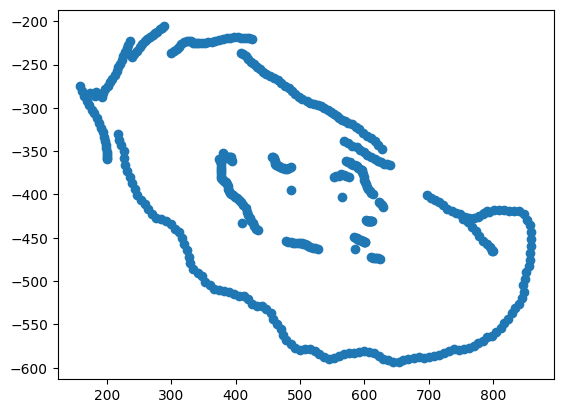

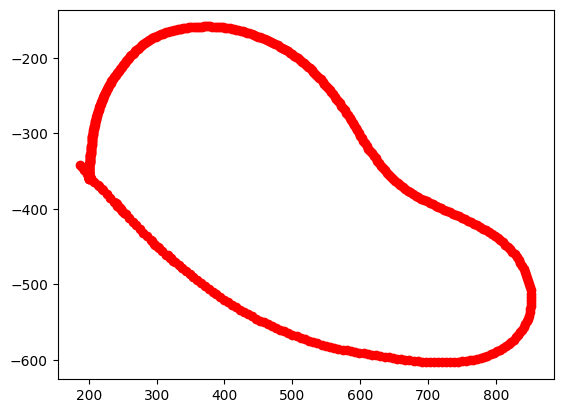

In [57]:
x = [point[0] for point in mean_positions]
y = [-point[1] for point in mean_positions] # because of how pygame handles position
plt.scatter(x, y)
plt.show()
x2 = [point[0] for point in mean_positions2]
y2 = [-point[1] for point in mean_positions2]
plt.scatter(x2, y2, color='red')
plt.show()

And this is about what should be expected if you have watched the two algorithms play. The PPO-trained model is very jittery and can be sometimes seen spinning in random loops. The SAC-trained model is smooth as butter.

In [59]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]

avg_len_p  = 0.0
avg_len_s = 0.0

for episode in ep_inf_p:
    avg_len_p += len(episode)
avg_len_p /= len(ep_inf_p)

for episode in ep_inf_s:
    avg_len_s += len(episode)
avg_len_s /= len(ep_inf_s)

print(f"Average length of PPO episode: {avg_len_p:.2f} | Average length of SAC episode: {avg_len_s:.2f}")

Average length of PPO episode: 277.60 | Average length of SAC episode: 461.90


To be perfectly honest, this one surprised me. I was aware that the SAC trained race car accelerates oddly (an artifact of the way the warmup policy runs, since I didn't want to make it too good and get docked marks for a scripted policy) but I thought the disgusting behaviour of the PPO car would outweigh that. Turns out though, I'm seeing the PPO car about 200 steps faster.

In [62]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]

avg_rew_p  = 0.0
avg_rew_s = 0.0

for episode in ep_inf_p:
    avg_rew_p += episode[-1]['episode_reward']
avg_rew_p /= len(ep_inf_p)

for episode in ep_inf_s:
    avg_rew_s += episode[-1]['episode_reward']
avg_rew_s /= len(ep_inf_s)

print(f"Average PPO episode reward: {avg_rew_p:.2f} | Average SAC episode reward: {avg_rew_s:.2f}")

Average PPO episode reward: 2440.90 | Average SAC episode reward: 2441.26


SAC beats it out on the results I have, but I suspect there is enough variance enough that they are functionally equivalent. 2440.90 compared to 2441.26 is less than a 0.5 unit reward difference.

In [66]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]

# Find the maximum number of steps among all episodes
max_steps_p = max(len(ep) for ep in ep_inf_p)
max_steps_s = max(len(ep) for ep in ep_inf_s)

mean_speeds = []
for step_idx in range(max_steps_p):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_p:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['car_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds.append(sum_speed / count)
    else:
        mean_speeds.append(None)  # or 0, depending on your needs

mean_speeds2 = []
for step_idx in range(max_steps_s):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_s:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['car_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds2.append(sum_speed / count)
    else:
        mean_speeds2.append(None)  # or 0, depending on your needs
print(mean_speeds)

[0.5762062549591065, 1.386303819020589, 1.9530020427703854, 2.5958534685770673, 3.147413733800252, 3.5947658379872642, 4.310230989456177, 4.764156643549602, 5.2796531534194955, 5.73727431456248, 6.0384788354237875, 6.4840338452657065, 7.044886878331502, 7.544298233985901, 7.775299557050069, 7.988654012680054, 8.0, 8.0, 8.0, 8.0, 6.4, 5.697463261286417, 5.906882518132528, 5.304204613367717, 5.564511251449585, 5.743773368199666, 6.025897391637167, 6.195611124038696, 6.385230423609416, 6.547092669804892, 6.663055658340454, 6.7997341759999586, 6.983154627482096, 7.263056844075521, 7.413220426241557, 7.562906425793966, 7.7250226672490445, 7.849108997980754, 7.947510658899944, 7.181607468922934, 7.279399693806965, 7.3545823097229, 7.419284159342448, 7.442969716389973, 7.4898444906870525, 7.548517039616902, 7.605825834274292, 7.680214064915975, 7.7373518403371175, 7.776250225702921, 7.731968139012655, 7.733818384806315, 7.766595465342204, 6.219901247024536, 6.355047769546508, 6.55474520047505

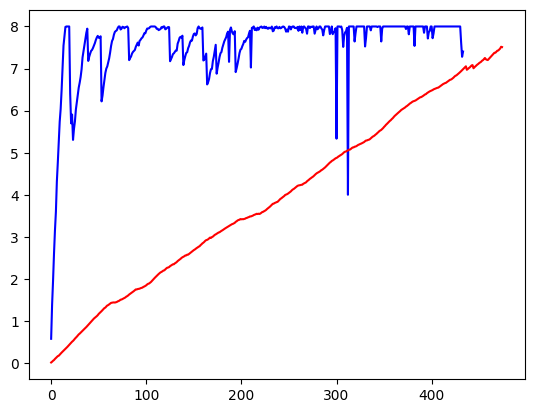

In [67]:
plt.plot(mean_speeds, color='blue')
plt.plot(mean_speeds2, color='red')
plt.show()

This graph is a little interesting, in just how drastically it varies. The PPO model has wild differences and downspikes in it's speed value, whereas the SAC trained model smoothly accelerates towards the maximum, and in fact never actually reaches it. The PPO model does finish faster on average, and so the graph doesn't reach all the way. In fact, the average PPO episode ends about 200 timesteps faster, so on some level the downspikes (at past 200) can be attributed to noise.